<a href="https://colab.research.google.com/github/DaegyuHwang/Deep-Learning/blob/main/GAN_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Generative Adversarial Networks

### # Generator (using DCGAN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, UpSampling2D, Conv2D, Activation

generator=Sequential()
generator.add(Dense(128*7*7,input_dim=100,activation=LeakyReLU(0.2))) # 128: arbitrary number of node; 7*7: original size of image; Upsampling2D function makes the size 7*7->14*14->28*28(goal size)
generator.add(BatchNormalization()) # Batch Normalization: making the input data has mean 0 and variance 1
generator.add(Reshape((7,7,128))) # chage the data frame so that convolution layer can take the data
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same')) # padding: if the size of the input and output are diff, expand the output size by putting 0 at the expanded cell
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2))) # LeakyReLu: revised version of relu function to complement the loss of neurans when x is negative value; when x<0 => multiplying 0.2 here
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))


### # Discriminator

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, LeakyReLU, Dropout, Flatten, Dense

# "strides": determine how many spaces the Kernel needs to move; by adjusting the size to move, we can get different features like doing "dropout" or "pooling"
discriminator=Sequential()
discriminator.add(Conv2D(64,kernel_size=5,strides=2,input_shape=(28,28,1),padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128,kernel_size=5,strides=2,padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten()) # change the 2D to 1D to use the "Dense" function
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable=False # freeze the discriminator, we are not training the discriminator. we are only sening the feedback to generator

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### # Run the DCGAN

Model: "functional_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 28, 28, 1)      │       865,281 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 1)              │       212,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,078,146 (4.11 MB)

 Trainable params: 852,609 (3.25 MB)

 Non-trainable params: 225,537 (881.00 KB)

epoch:0  d_loss:0.6543  g_loss:0.6056
epoch:100  d_loss:0.4122  g_loss:0.3361
epoch:200  d_loss:0.4233  g_loss:0.4393
epoch:300  d_loss:0.5212  g_loss:0.5765
epoch:400  d_loss:0.5774  g_loss:0.6399
epoch:500  d_loss:0.6028  g_loss:0.6768
epoch:600  d_loss:0.6172  g_loss:0.7028
epoch:700  d_loss:0.6255  g_loss:0.7202
epoch:800  d_loss:0.6310  g_loss:0.7330
epoch:900  d_loss:0.6360  g_loss:0.7398
epoch:1000  d_loss:0.6418  g_loss:0.7417
epoch:1100  d_loss:0.6459  g_loss:0.7453
epoch:1200  d_loss:0.6485  g_loss:0.7508
epoch:1300  d_loss:0.6506  g_loss:0.7553
epoch:1400  d_loss:0.6526  g_loss:0.7587
epoch:1500  d_loss:0.6544  g_loss:0.7607
epoch:1600  d_loss:0.6560  g_loss:0.7625
epoch:1700  d_loss:0.6574  g_loss:0.7643
epoch:1800  d_loss:0.6587  g_loss:0.7661
epoch:1900  d_loss:0.6600  g_loss:0.7672
epoch:2000  d_loss:0.6609  g_loss:0.7684
epoch:2100  d_loss:0.6618  g_loss:0.7690
epoch:2200  d_loss:0.6626  g_loss:0.7697
epoch:2300  d_loss:0.6633  g_loss:0.7706
epoch:2400  d_loss:0.6639  g

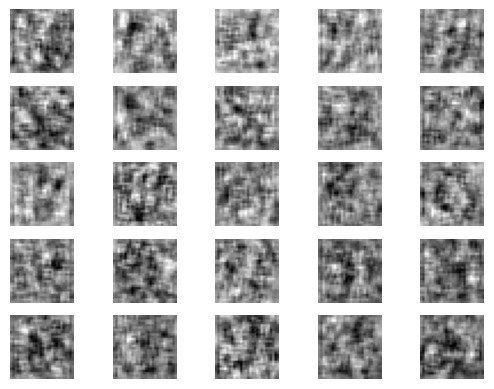

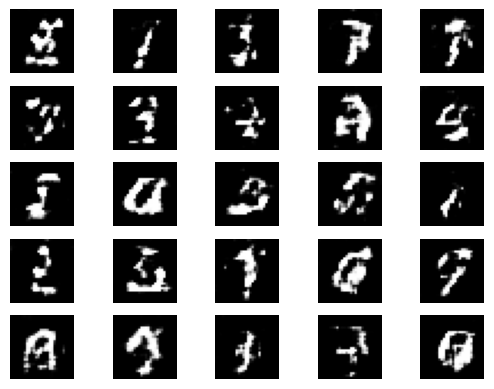

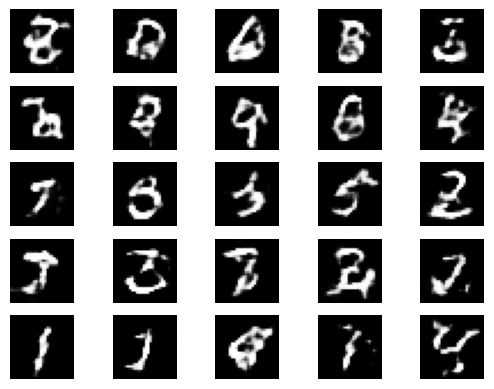

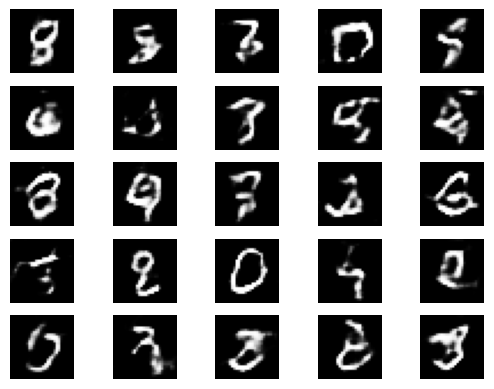

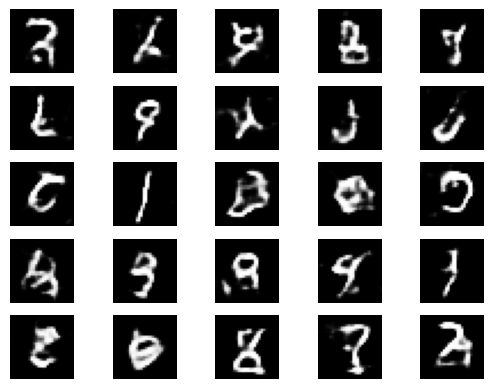

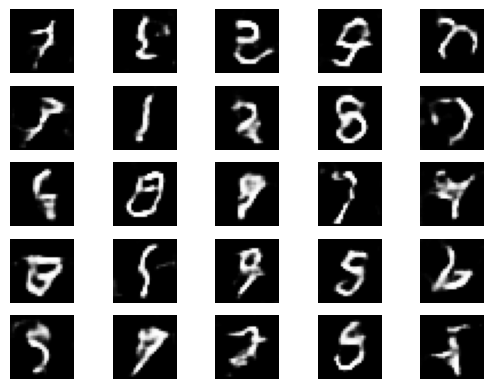

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import os
os.makedirs("./data/gan_images", exist_ok=True)

## Generator model
generator = Sequential()
generator.add(Dense(128*7*7, input_dim=100, activation=LeakyReLU(0.2))) # 128: arbitrary number of node; 7*7: original size of image; Upsampling2D function makes the size 7*7->14*14->28*28(goal size)
generator.add(BatchNormalization()) # Batch Normalization: making the input data has mean 0 and variance 1
generator.add(Reshape((7, 7, 128))) # change the data frame so that convolution layer can take the data
generator.add(UpSampling2D())
generator.add(Conv2D(64, kernel_size=5, padding='same')) # padding: if the size of the input and output are diff, expand the output size by putting 0 at the expanded cell
generator.add(BatchNormalization())
generator.add(Activation(LeakyReLU(0.2))) # LeakyReLu: revised version of relu function to complement the loss of neurans when x is negative value; when x<0 => multiplying 0.2 here
generator.add(UpSampling2D())
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))


## Discriminator model
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28,28,1), padding="same")) # "strides": determine how many spaces the Kernel needs to move; by adjusting the size to move, we can get different features like doing "dropout" or "pooling"
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same"))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten()) # change the 2D to 1D to use the "Dense" function
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy']) # Removed the extra parenthesis here
discriminator.trainable = False # freeze the discriminator, we are not training the discriminator. we are only sening the feedback to generator

## Gan model to connect the generator to the discriminator
ginput = Input(shape=(100,)) # put randomly created 100 vectors into Input() function of KERAS
dis_output = discriminator(generator(ginput)) # D(G(input)); the result will be true or false
gan = Model(ginput, dis_output) # create a new model using the ginput and dis_output
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
gan.summary()


## Create gan_train function to run neural network
# batch size determines how many true and false images should be given to discriminator at one time
# saving_interval defines how often should the model be saved
def gan_train(epoch, batch_size, saving_interval):

  # call the MNIST data # we need only the image so call the X_train only
  (X_train, _), (_, _) = mnist.load_data()
  X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') # width and length are both 29 pixels, and we are dealing with black and white color by using parameter 1.
  X_train = (X_train - 127.5) / 127.5   # As a result of using "tanh" function for the geneator, we get value from -1 to 1. So we need to change the pixel values ​​to stay within the boundaries.

  true = np.ones((batch_size, 1)) # array for the true images
  fake = np.zeros((batch_size, 1)) # array for the fake images


  for i in range(epoch):
          discriminator.trainable = True

          # input the real images to discriminator
          idx = np.random.randint(0, X_train.shape[0], batch_size) # select the images randomly
          imgs = X_train[idx]
          d_loss_real = discriminator.train_on_batch(imgs, true) # update the model

          # input the fake images to discriminator
          noise = np.random.normal(0, 1, (batch_size, 100)) # create random noise
          gen_imgs = generator.predict(noise, verbose=0)
          d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

          # the loss for the discriminator and generator
          d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
          discriminator.trainable = False

          noise = np.random.normal(0, 1, (batch_size, 100))
          g_loss = gan.train_on_batch(noise, true)

          # print the loss of the generator and discriminaator
          if i % 100 == 0:
            print('epoch:%d' % i, ' d_loss:%.4f' % d_loss[0], ' g_loss:%.4f' % g_loss)


          if i % saving_interval == 0:
              noise = np.random.normal(0, 1, (25, 100)) # create random noise
              gen_imgs = generator.predict(noise, verbose=0)

              # Rescale images 0 - 1
              gen_imgs = 0.5 * gen_imgs + 0.5

              fig, axs = plt.subplots(5, 5)
              count = 0
              for j in range(5):
                  for k in range(5):
                      axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap='gray')
                      axs[j, k].axis('off')
                      count += 1
              fig.savefig("./data/gan_images/gan_mnist_%d.png" % i)

# Notice that one more iteration left after 4000 time of iterations
# the size of batch is 32, so that the result will be saved in every 800 iterations
gan_train(4001, 32, 800)
